# 0. Imports 

In [1]:
import hsnowtrans as hst 

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist
import torch
import torch_geometric
import time

# 1. Ring-shaped Manifold data 

## ${\cal V}=\{v_1,\dots,v_N\}=\{(x_1,y_1),\dots,(x_N,y_N)\}$

In [5]:
np.random.seed(777)
N=1000
angle=np.linspace(-np.pi,np.pi-2*np.pi/N,N)
radius=1
Vx,Vy = radius*np.cos(angle),radius*np.sin(angle)
V = np.stack([Vx,Vy],axis=1)

## $\boldsymbol{f}: {\cal V} \to \mathbb{R}$

In [113]:
f = np.zeros(N)
f[Vy<0] = -3+np.random.normal(size=sum(Vy<0),scale=0.5)
f[Vy>=0] = 3+np.random.normal(size=sum(Vy>=0),scale=0.5)

## Visualization

In [119]:
def plot_ring(V,f,angle):
    fig = plt.Figure()
    ax = fig.add_subplot(projection='3d')
    ax.grid(False)
    ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
    ax.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
    ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
    top = f
    bottom = np.zeros_like(top)
    width=0.05
    ax.bar3d(
        x=Vx, 
        y=Vy, 
        z=0, 
        dx=0.001, 
        dy=0.001, 
        dz=f, 
        shade=False,
        color=cm.rainbow((angle+np.pi)/2/np.pi)
    )
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-5,5)
    return fig    

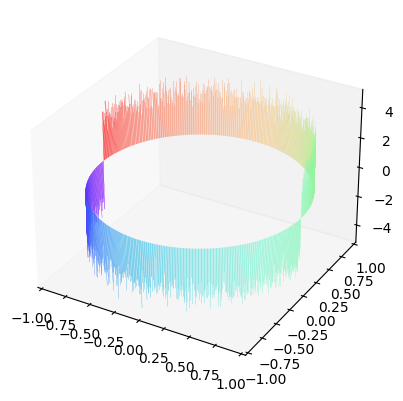

In [121]:
plot_ring(V,f,angle)

# 2. Weight Matrix

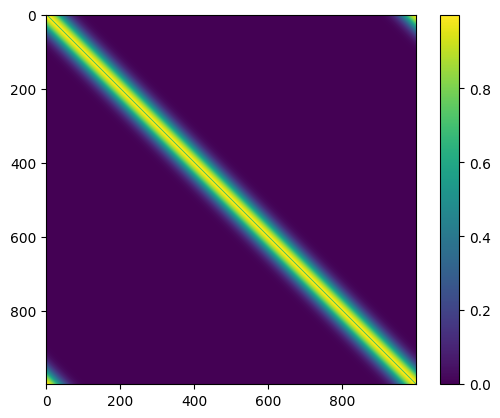

In [157]:
theta = 0.2
distance_matrix = cdist(V,V,'euclidean')
weight_matrix = np.exp(-distance_matrix**2/(2*theta**2)) - np.eye(N)
plt.imshow(weight_matrix)
plt.colorbar()

# 3. `torch_geometric`

In [2]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
data = torch_geometric.data.Data(x=x, edge_index=edge_index) # torch_geometric.data.Data는 그래프자료형을 만드는 클래스

In [3]:
data

Data(x=[3, 1], edge_index=[2, 4])